### t-SNE: initialization with k-means

- In this paper [1], authors describe a way of converting a high-dimensional data set into a matrix of pairwise similarities and introduce a technique, called “t-SNE”, for visualizing the resulting similarity data. 
- t-SNE is capable of capturing much of the local structure of the high-dimensional data very well, while also revealing global structure such as the presence of clusters at several scales.
- both the computational and the memory complexity of t-SNE are O(n2)

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [8]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

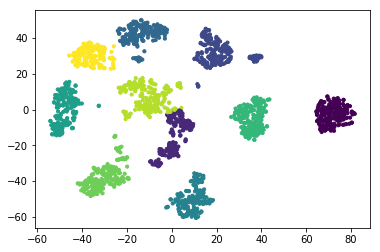

In [21]:
# Plot t-sne projection
plt.scatter(digits_proj[:, 0], digits_proj[:, 1], s=10, c=labels)
plt.show()

In [9]:
# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [10]:
from sklearn.metrics import accuracy_score
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9371174179187535

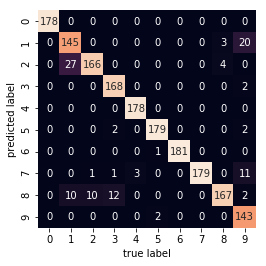

In [13]:
# Confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### So from the confusion matrix we can see, that the higher error is caused by 
- `9` that look like `1`
- `2` that look like `1`
- `1,2,3` that look like `8`

Let's investigate the case, where the predicted labels was `2` while the ground truth is `1`.

#### Number of components in the transformation was 2, so cluster_centers_.shape, instead of (10,64) in the k-means would be:

In [20]:
kmeans.cluster_centers_.shape

(10, 2)

So if we want to plot the values that got misclassified, we need to find their item in t-sne and then plot it before transformation:

In [42]:
# Find the indexes, where true value is one
ones = np.where((digits.target==1))

In [43]:
# Find the indexes, where predicted value is two
twos = np.where((labels==2))

In [46]:
# Find the intersection of two arrays
index = np.intersect1d(ones, twos, assume_unique=False, return_indices=False)

In [47]:
index.shape

(27,)

In [48]:
false_twos = digits.data[index,:]
false_twos.shape

(27, 64)

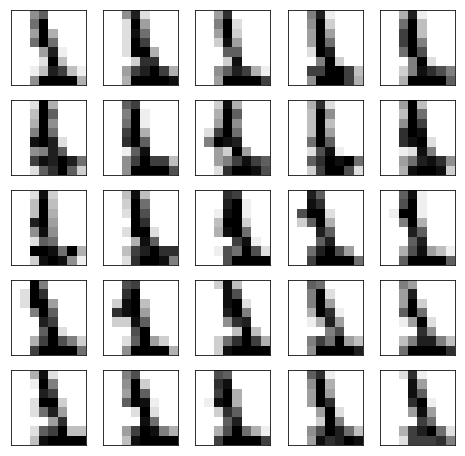

In [49]:
### plot 25 of falsely classified ones
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
centers = false_twos.reshape(-1, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center,cmap=plt.cm.binary)

### References:

1. Jake VanderPlas. 2016. Python Data Science Handbook: Essential Tools for Working with Data (1st. ed.). O'Reilly Media, Inc.
2. Maaten, L. V. D., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of machine learning research, 9(Nov), 2579-2605.